# Clustering for gevtev

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
#path_to_gamma_bins shoud contain an absolute path to your gamma-bins directory
path_to_gamma_bins = os.path.dirname(os.getcwd()) + "/"

In [3]:
#name columns included in the final display
other_names = ['gev_1FGL_Name', 'gev_CLASS1', 'tev_fermi_names', 'tev_classes', 'marked']
#from gamma bins directory
path_to_catalog = "markeddata/gevtev_TeVspectrum_normalized.txt"

In [4]:
spectra = pd.read_csv(path_to_gamma_bins +path_to_catalog)
spectra.head()

,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,0.055155,0.201477,0.000004,0.235066,0.028249,0.0,0.391619,0.072840,0.013193,0.002028,0.000367,b' ',b'bll ',b'',b'hbl',0
1,0.069119,0.073172,0.003407,0.038325,0.145615,0.0,0.134071,0.020429,0.006452,0.059379,0.450031,b' ',b'snr ',b'',b'snr',0
2,0.358190,0.178179,0.096737,0.268908,0.097987,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
3,0.269005,0.157462,0.139724,0.220561,0.213247,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
4,0.427725,0.147237,0.104148,0.231066,0.089825,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0


In [5]:
spectrum_columns = spectra.columns[:-len(other_names)]

In [6]:
spectra[spectrum_columns].sum(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
81     1.0
82     1.0
83     1.0
84     1.0
85     1.0
86     1.0
87     1.0
88     1.0
89     1.0
90     1.0
91     1.0
92     1.0
93     1.0
94     1.0
95     1.0
96     1.0
97     1.0
98     1.0
99     1.0
100    1.0
101    1.0
102    1.0
103    1.0
104    1.0
105    1.0
106    1.0
107    1.0
108    1.0
109    1.0
110    1.0
Length: 111, dtype: float64

In [7]:
def get_distance_metric(metric_function):
    if type(metric_function) == str:
        dist = DistanceMetric.get_metric(metric_function)
    else:
        dist = DistanceMetric.get_metric("pyfunc", func=metric_function)
    return dist

* ### earth mover's distance

In [8]:
# earth mover's distance
metric_function = st.wasserstein_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)
# spectra_distances = get_distance_metric(metric_function).pairwise(spectra[spectrum_columns])
#pd.DataFrame(spectra_distances).to_csv(path_to_gamma_bins +"markeddata/gevtev_spectra_EM_distances.txt", index=False)

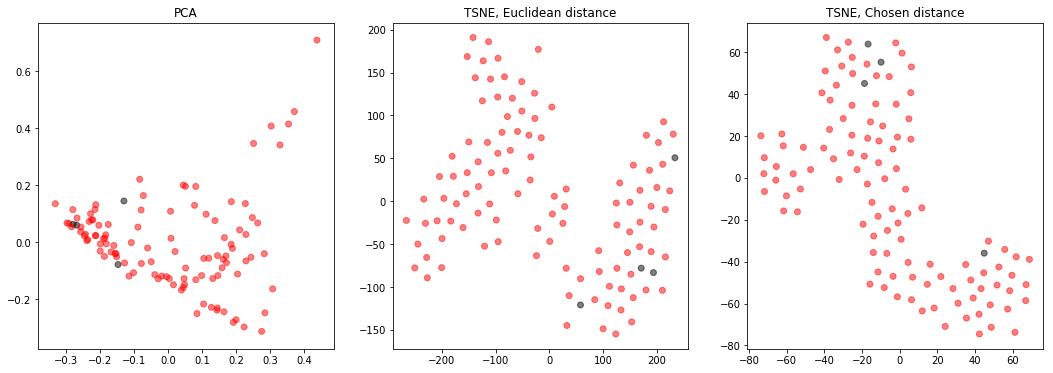

In [11]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=700)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

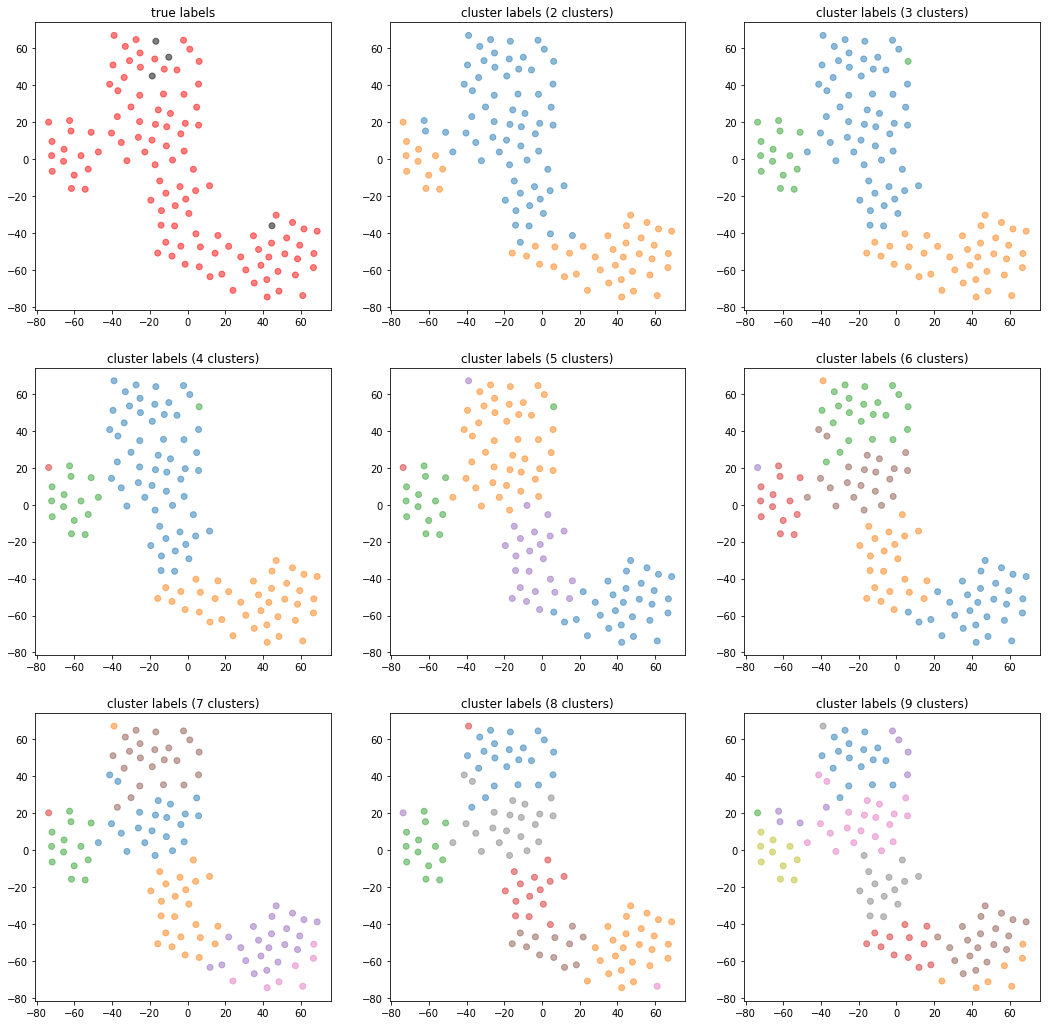

In [12]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42, learning_rate=500)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 18))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [14]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

0 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
5,b' ',b'bll ',b'',b'hbl',0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',0
24,b' ',b'PWN ',b'',b'pwn',0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',0
33,b' ',b'PWN ',b'',b'pwn',0
37,b' ',b'bll ',b'',b'hbl',0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',0
54,b' ',b'PWN ',b'',b'pwn',0


1 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',0
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0


2 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
13,b' ',b'rdg ',b'',b'hbl',0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',0
26,b' ',b'bll ',b'',b'hbl',0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',0
39,b' ',b'PSR ',b'',b'pwn',0
40,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1
41,b'1FGL J1028.4-5819 ',b'PSR ',b'',b'pwn',0


3 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b' ',b'snr ',b'',b'snr',0
10,b' ',b'bll ',b'',b'hbl',0
16,b' ',b'bll ',b'',b'hbl',0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',0
21,b' ',b' ',b'',"b'snr,mc'",0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',0
56,b'1FGL J1325.6-4300 ',b'RDG ',b'',b'fri',0
57,b' ',b'PSR ',b'',b'pwn',0


4 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',0


5 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b' ',b'bll ',b'',b'hbl',0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',0
22,b' ',b'PWN ',b'',b'psr',0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',0
51,b'1FGL J1224.7+2121 ',b'FSRQ ',b'',b'fsrq',0


* ### euclidean distance

In [16]:
# euclidean distance
from scipy.spatial.distance import euclidean
metric_function = "euclidean"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

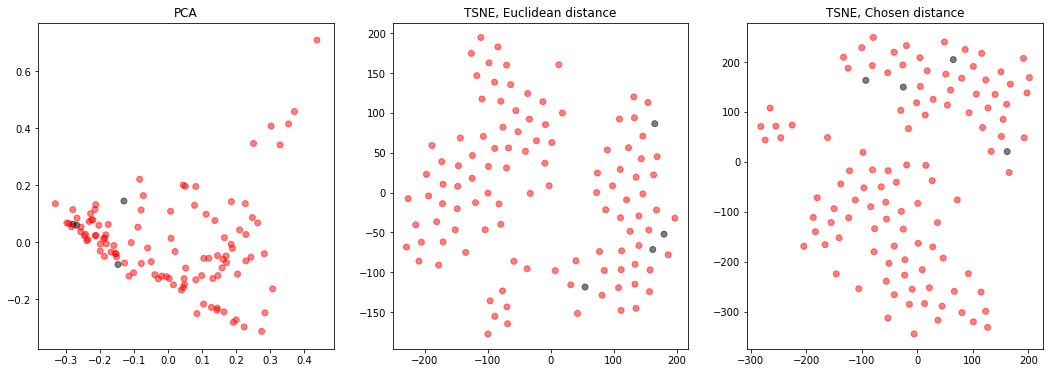

In [18]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=700, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=800)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

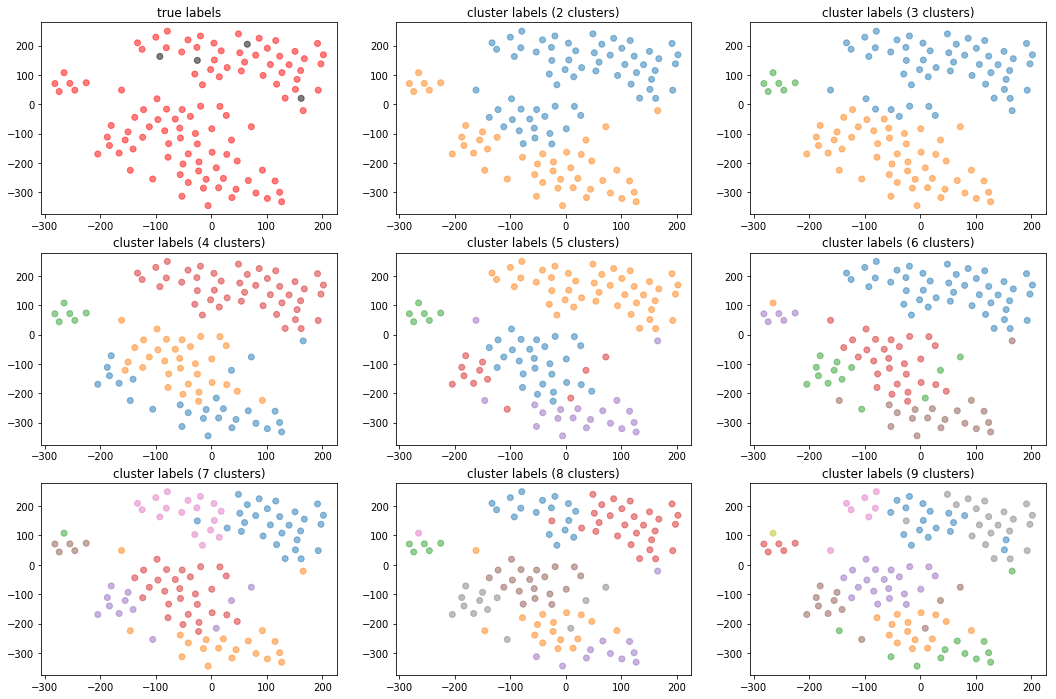

In [19]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=800)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [20]:
n = 6

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",0
33,b' ',b'PWN ',b'',b'pwn',0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',0


1 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',0


2 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0
13,b' ',b'rdg ',b'',b'hbl',0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',0
21,b' ',b' ',b'',"b'snr,mc'",0
22,b' ',b'PWN ',b'',b'psr',0
26,b' ',b'bll ',b'',b'hbl',0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',0


3 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',0


4 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b' ',b'snr ',b'',b'snr',0
16,b' ',b'bll ',b'',b'hbl',0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',0


5 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b' ',b'bll ',b'',b'hbl',0
5,b' ',b'bll ',b'',b'hbl',0
10,b' ',b'bll ',b'',b'hbl',0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',0
24,b' ',b'PWN ',b'',b'pwn',0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',0
37,b' ',b'bll ',b'',b'hbl',0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.032026,0.234135,0.268899,0.127643,0.273874,0.0,0.023778,0.014571,0.010618,0.008727,0.005731
1,0.000057,0.000393,0.000838,0.000202,0.000636,0.0,0.000009,0.000187,0.002927,0.059691,0.935061
2,0.399042,0.164704,0.047170,0.236372,0.081918,0.0,0.022925,0.013262,0.014637,0.012300,0.007671
3,0.204113,0.168191,0.132884,0.201579,0.135431,0.0,0.076896,0.033963,0.020694,0.012426,0.013823
4,0.078004,0.041391,0.011833,0.049710,0.049516,0.0,0.080082,0.021528,0.027623,0.120868,0.519444
5,0.125595,0.082752,0.099948,0.094567,0.082094,0.0,0.280246,0.095703,0.061352,0.043491,0.034252


* ### cosine distance

In [21]:
# cosine distance
# from scipy.spatial.distance import cosine
metric_function = "cosine"
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

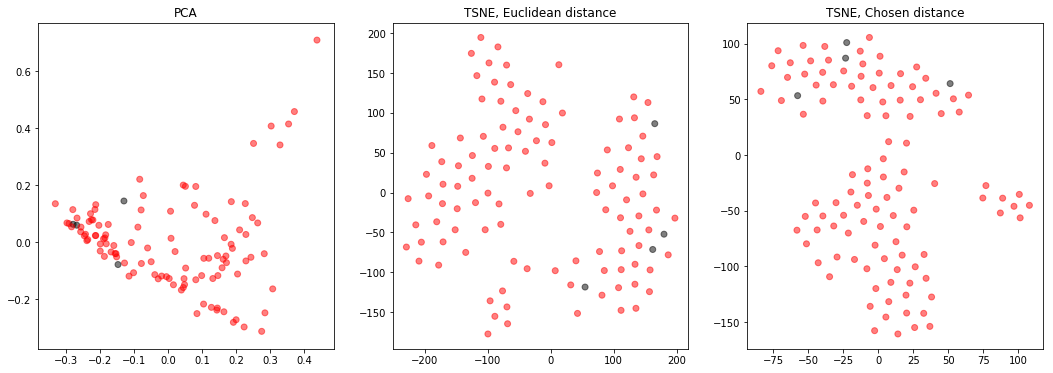

In [22]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=700, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=400)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

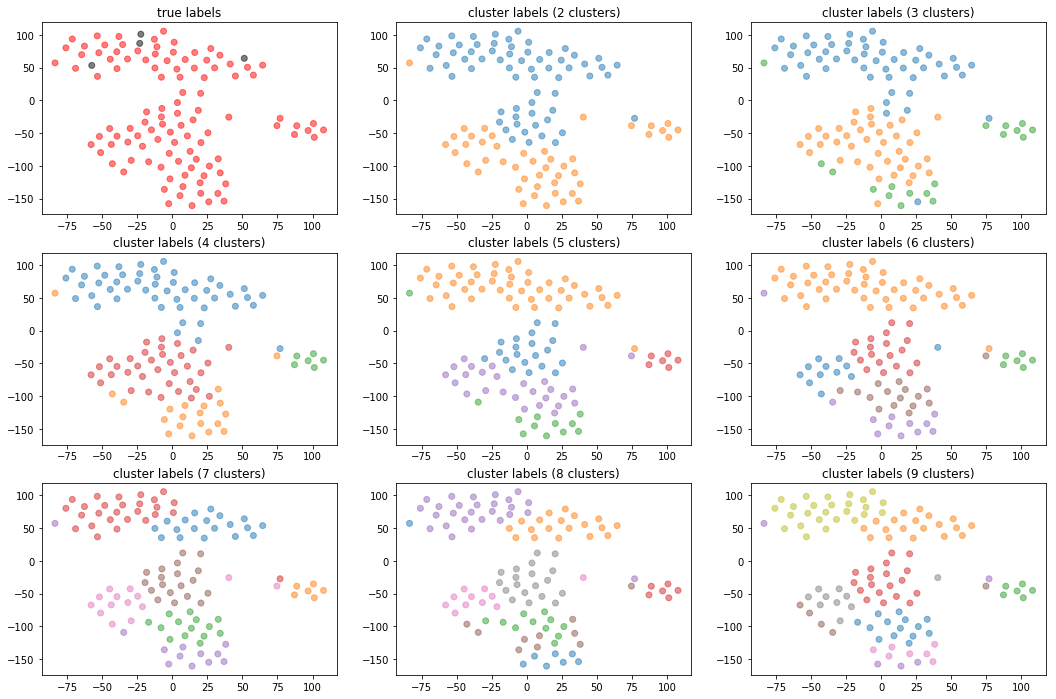

In [23]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=400)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [24]:
n = 7

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",0
35,b'1FGL J0956.5+6938 ',b'sbg ',"b'1FGL J0956.5+6938,2FGL J0955.9+6936,3FGL J09...",b'galaxy',0
41,b'1FGL J1028.4-5819 ',b'PSR ',b'',b'pwn',0
52,b'1FGL J1230.8+1223 ',b'rdg ',b'',b'fri',0
58,b'1FGL J1418.7-6057 ',b'PSR ',b'',b'pwn',0
59,b'1FGL J1418.7-6057 ',b'PSR ',b'',b'pwn',0
76,b'1FGL J1714.5-3830c',b'snr ',b'',"b'snr,mc'",0
78,b'1FGL J1718.2-3825 ',b'PSR ',b'',b'pwn',0
83,b' ',b' ',b'',b'unid',0


1 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b' ',b'snr ',b'',b'snr',0
16,b' ',b'bll ',b'',b'hbl',0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',0
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',0


2 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
5,b' ',b'bll ',b'',b'hbl',0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',0
17,b'1FGL J0416.8+0107 ',b'bll ',b'',b'hbl',0
24,b' ',b'PWN ',b'',b'pwn',0
28,b'1FGL J0648.8+1516 ',b'bll ',b'1FGL J0648.8+1516',b'hbl',0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',0
72,b'1FGL J1640.8-4634c',b'spp ',b'',b'pwn',0
81,b'1FGL J1744.2+1934 ',b'bll ',b'',b'hbl',0


3 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',0
25,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'pwn',0
33,b' ',b'PWN ',b'',b'pwn',0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',0
39,b' ',b'PSR ',b'',b'pwn',0
40,b'1FGL J1018.6-5856 ',b'HMB ',b'1FGL J1018.6-5856',b'bin',1
44,b'1FGL J1119.4-6127c',b'PSR ',b'',b'pwn',0


4 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b' ',b'bll ',b'',b'hbl',0
10,b' ',b'bll ',b'',b'hbl',0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',0
54,b' ',b'PWN ',b'',b'pwn',0
57,b' ',b'PSR ',b'',b'pwn',0
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',0
66,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',0
67,b'1FGL J1514.7-5917 ',b'PWN ',b'',b'pwn',0
71,b'1FGL J1626.0-4917c',b' ',b'',b'unid',0
75,b'1FGL J1711.7-3944c',b'SNR ',b'',b'snr',0


5 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',0
18,b'1FGL J0449.5-4350 ',b'bll ',b'',b'hbl',0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',0
31,b'1FGL J0721.9+7120 ',b'BLL ',b'',b'ibl',0
32,b'1FGL J0809.5+5219 ',b'bll ',b'',b'hbl',0
46,b'1FGL J1136.2+6739 ',b'bll ',b'',b'hbl',0
47,b'1FGL J1217.7+3007 ',b'bll ',b'',b'hbl',0


6 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0
13,b' ',b'rdg ',b'',b'hbl',0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',0
21,b' ',b' ',b'',"b'snr,mc'",0
22,b' ',b'PWN ',b'',b'psr',0
26,b' ',b'bll ',b'',b'hbl',0
29,b'1FGL J0650.7+2503 ',b'bll ',b'',b'hbl',0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',0
37,b' ',b'bll ',b'',b'hbl',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.035722,0.306657,0.160522,0.176208,0.289881,0.0,0.012649,0.006399,0.005212,0.005200,0.001551
1,0.065013,0.034558,0.010000,0.041459,0.041369,0.0,0.066737,0.017971,0.023507,0.110672,0.588713
2,0.222731,0.131923,0.042277,0.163071,0.084460,0.0,0.213176,0.078976,0.037185,0.016394,0.009808
3,0.030399,0.179411,0.342065,0.093458,0.257385,0.0,0.031821,0.019966,0.014365,0.012848,0.018283
4,0.068197,0.074148,0.122118,0.075636,0.090565,0.0,0.301242,0.111958,0.078870,0.051441,0.025824
5,0.211460,0.177559,0.166865,0.211891,0.151963,0.0,0.051864,0.012962,0.007328,0.005065,0.003042
6,0.376884,0.155570,0.058572,0.226419,0.080532,0.0,0.011534,0.017238,0.022862,0.024151,0.026239


* ### energy distance

In [25]:
# energy distance
metric_function = st.energy_distance
spectra_distances = pairwise_distances(spectra[spectrum_columns], metric=metric_function)

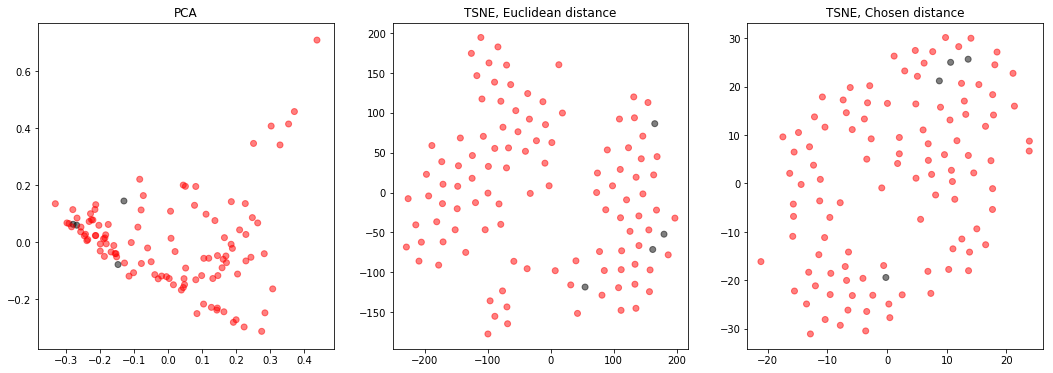

In [27]:
colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])

plt.subplots(figsize=(18, 6))
plt.subplot(131)
plt.title("PCA")
pca = PCA(n_components=2, random_state=42)
spectra_2D = pca.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(132)
plt.title("TSNE, Euclidean distance")
tsne = TSNE(n_components=2, random_state=42, learning_rate=700, n_iter=1500)
spectra_2D = tsne.fit_transform(spectra[spectrum_columns])
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

plt.subplot(133)
plt.title("TSNE, Chosen distance")
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
plt.show()

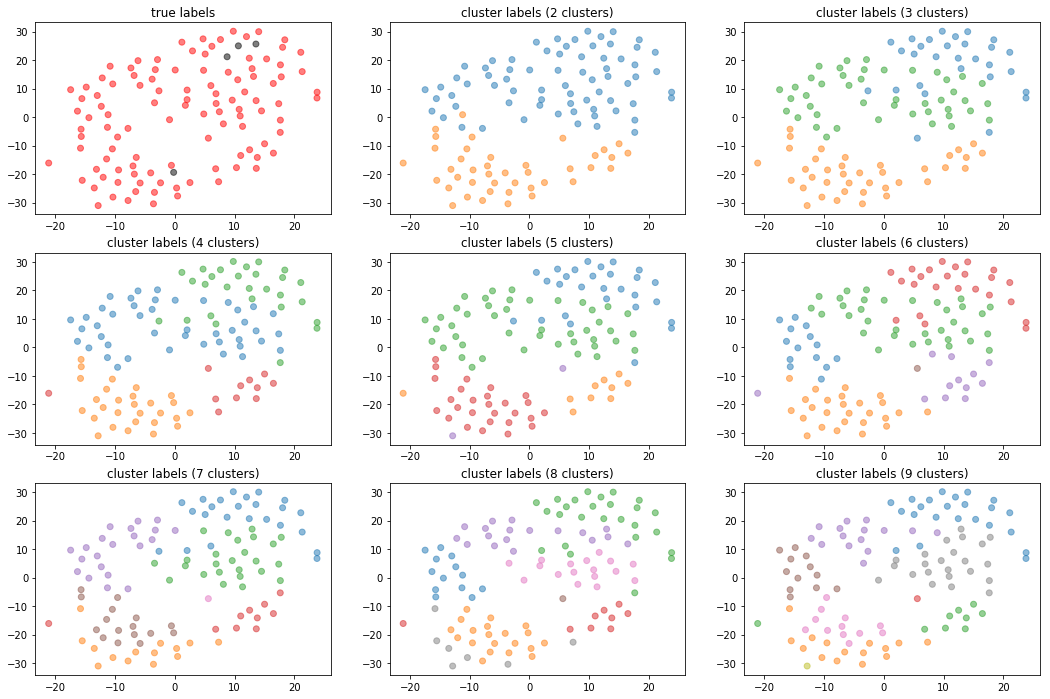

In [28]:
# visualization - tsne with Euclidean distance
# tsne = TSNE(n_components=2, random_state=42)
# spectra_2D = tsne.fit_transform(spectra[spectrum_columns])

# visualization - tsne with chosen distance
tsne = TSNE(n_components=2, random_state=42, metric="precomputed", learning_rate=300)
spectra_2D = tsne.fit_transform(spectra_distances)

plt.subplots(figsize=(18, 12))
plt.subplot(3, 3, 1)

colors = ['red','black']
c = spectra['marked'].apply(lambda x: colors[x])
plt.title("true labels")
plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

for n in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=n, random_state=42)
    cluster_labels = kmeans.fit_predict(spectra_distances)

    plt.subplot(3, 3, n)
    c = [colors[l] for l in cluster_labels]
    plt.title("cluster labels ({} clusters)".format(n))
    plt.scatter(spectra_2D[:, 0], spectra_2D[:, 1], c=c, alpha=0.5)
    
plt.show()

In [29]:
n = 5

kmeans = cluster.KMeans(n_clusters=n, random_state=42)
cluster_labels = kmeans.fit_predict(spectra_distances)
centers = []

spectra['KMeans_clusters_' + str(n)] = cluster_labels
for i in range(n):
    print("{} cluster".format(i))
    display(spectra[spectra['KMeans_clusters_' + str(n)] == i][other_names])
    centers.append(spectra.loc[spectra['KMeans_clusters_' + str(n)] == i, spectrum_columns].mean(axis=0).values)
centers = pd.DataFrame(np.column_stack(centers).T, columns=spectrum_columns)

# centroids
print("centroids:")
display(centers)
# plt.figure(figsize=(20, 10))
# sns.heatmap(centers, vmin=0, vmax=1)
# plt.show()

0 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
6,b'1FGL J0205.6+6449 ',b'PSR ',b'',b'pwn',0
11,b'1FGL J0240.5+6113 ',b'HMB ',b'',b'bin',1
13,b' ',b'rdg ',b'',b'hbl',0
19,b'1FGL J0507.9+6738 ',b'bll ',b'',b'hbl',0
22,b' ',b'PWN ',b'',b'psr',0
23,b'1FGL J0534.5+2200 ',b'PSR ',b'',b'psr',0
26,b' ',b'bll ',b'',b'hbl',0
27,b'1FGL J0633.9+1746 ',b'PSR ',b'',"b'psr,pwn'",0
34,b'1FGL J0847.2+1134 ',b'bll ',"b'1FGL J0847.2+113,2FGL J0847.2+1134,3FGL J084...",b'hbl',0
36,b'1FGL J1000.1+6539 ',b'bll ',b'',b'blazar',0


1 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
1,b' ',b'snr ',b'',b'snr',0
10,b' ',b'bll ',b'',b'hbl',0
16,b' ',b'bll ',b'',b'hbl',0
21,b' ',b' ',b'',"b'snr,mc'",0
38,b'1FGL J1015.1+4927 ',b'bll ',b'',b'hbl',0
42,b'1FGL J1103.7-2329 ',b'bll ',b'',b'hbl',0
49,b'1FGL J1221.5+2814 ',b'bll ',b'',b'ibl',0
57,b' ',b'PSR ',b'',b'pwn',0
66,b'1FGL J1513.2-5904 ',b'PSR ',b'',b'pwn',0
69,b'1FGL J1555.7+1111 ',b'BLL ',b'',b'hbl',0


2 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
0,b' ',b'bll ',b'',b'hbl',0
2,b'1FGL J0033.5-1921 ',b'bll ',b'',b'hbl',0
3,b'1FGL J0035.9+5951 ',b'bll ',b'',b'hbl',0
4,b'1FGL J0136.5+3905 ',b'bll ',b'',b'hbl',0
7,b'1FGL J0221.0+3555 ',b'FSRQ ',b'',b'blazar',0
8,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'ibl',0
9,b'1FGL J0222.6+4302 ',b'BLL ',b'',b'unid',0
12,b'1FGL J0303.5-2406 ',b'BLL ',b'',b'hbl',0
14,b'1FGL J0319.7+4130 ',b'RDG ',b'',b'fri',0
15,b'1FGL J0319.7+1847 ',b'bll ',b'',b'hbl',0


3 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
5,b' ',b'bll ',b'',b'hbl',0
20,b'1FGL J0521.7+2114 ',b'bll ',b'',b'ibl',0
24,b' ',b'PWN ',b'',b'pwn',0
30,b'1FGL J0710.6+5911 ',b'bll ',b'1FGL J0710.6+5911',b'hbl',0
33,b' ',b'PWN ',b'',b'pwn',0
37,b' ',b'bll ',b'',b'hbl',0
43,b'1FGL J1104.4+3812 ',b'BLL ',b'',b'hbl',0
45,b'1FGL J1136.6+7009 ',b'bll ',b'',b'hbl',0
54,b' ',b'PWN ',b'',b'pwn',0
55,b' ',b'bcu ',b'',b'hbl',0


4 cluster


,gev_1FGL_Name,gev_CLASS1,tev_fermi_names,tev_classes,marked
63,b'1FGL J1443.8+2457 ',b'fsrq ',b'3FGL J1443.9+2502',b'fsrq',0
65,b'1FGL J1512.8-0906 ',b'FSRQ ',b'',b'fsrq',0


centroids:


,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,gev_nuFnu30_100,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,0.102904,0.252913,0.214384,0.168604,0.251300,0.0,0.003604,0.002165,0.001597,0.001387,0.001143
1,0.105247,0.056025,0.084668,0.052154,0.077468,0.0,0.197840,0.046117,0.038146,0.073618,0.268717
2,0.154746,0.191271,0.189231,0.180177,0.189818,0.0,0.068442,0.014268,0.006515,0.003885,0.001647
3,0.160702,0.112311,0.114436,0.119376,0.100277,0.0,0.148497,0.090151,0.064292,0.048146,0.041812
4,0.019355,0.038043,0.064034,0.056557,0.059390,0.0,0.072998,0.060791,0.052758,0.072499,0.503576
